## **Q1**

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


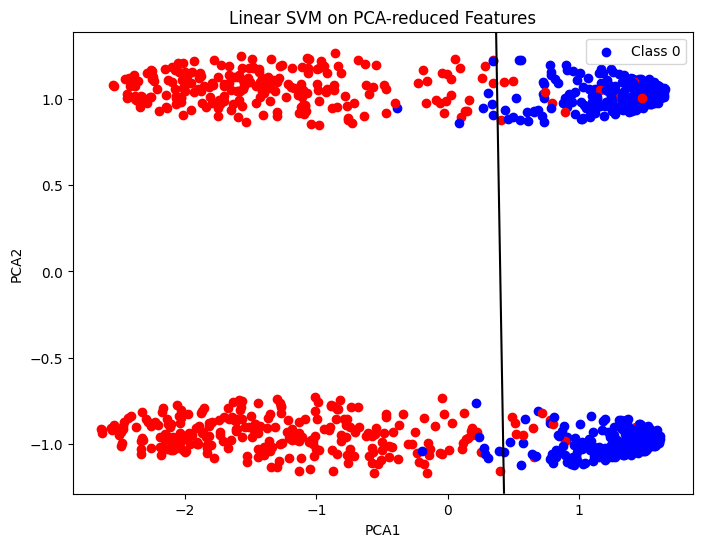

In [3]:
X = data.drop(columns=['Clicked on Ad', 'Timestamp'])
y = data['Clicked on Ad']

categorical_cols = ['Ad Topic Line', 'City', 'Country']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

X_processed = preprocessor.fit_transform(X)

# PCA to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_pca, y)

plt.figure(figsize=(8, 6))
for i in range(len(X_pca)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c='red' if y[i] == 1 else 'blue', label=f"Class {y[i]}" if i == 0 else "")

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = svc_linear.decision_function(xy).reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
plt.title("Linear SVM on PCA-reduced Features")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

## **Q2**

In [4]:
# Train polynomial kernel SVM (degree=2, 3)
svc_poly2 = SVC(kernel='poly', degree=2)
svc_poly3 = SVC(kernel='poly', degree=3)

svc_poly2.fit(X_pca, y)
svc_poly3.fit(X_pca, y)

# Train RBF kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_pca, y)

# Print results
print("Polynomial (degree=2):")
print(classification_report(y, svc_poly2.predict(X_pca)))

print("Polynomial (degree=3):")
print(classification_report(y, svc_poly3.predict(X_pca)))

print("RBF Kernel:")
print(classification_report(y, svc_rbf.predict(X_pca)))


Polynomial (degree=2):
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       500
           1       1.00      0.37      0.54       500

    accuracy                           0.69      1000
   macro avg       0.81      0.69      0.65      1000
weighted avg       0.81      0.69      0.65      1000

Polynomial (degree=3):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       500
           1       0.97      0.95      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

RBF Kernel:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       500
           1       0.98      0.95      0.96       500

    accuracy                           0.96      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg    

## **Q3**

In [5]:
svc_rbf_custom = SVC(kernel='rbf', C=10, gamma=0.01)
svc_rbf_custom.fit(X_pca, y)
print("RBF with C=10, gamma=0.01:")
print(classification_report(y, svc_rbf_custom.predict(X_pca)))


RBF with C=10, gamma=0.01:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       500
           1       0.98      0.95      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



## **Q4**

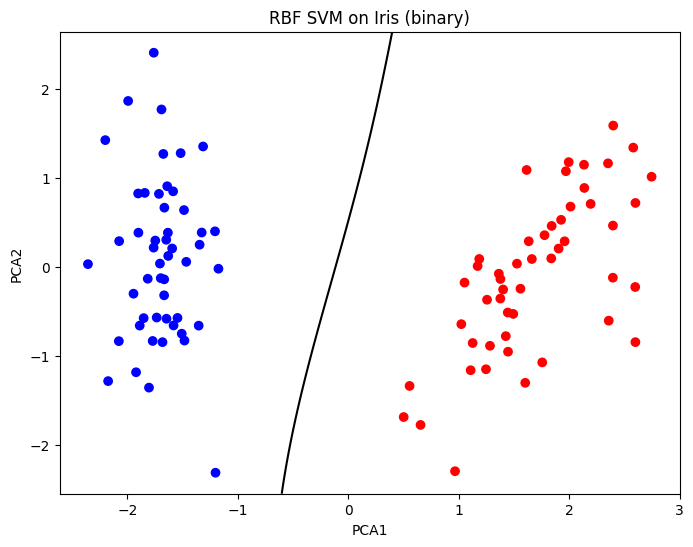

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Reduce to binary classification (for visual clarity)
X = X[y != 2]
y = y[y != 2]

# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
X_pca = PCA(n_components=2).fit_transform(X_std)

svc = SVC(kernel='rbf', C=1, gamma=0.1)
svc.fit(X_pca, y)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = svc.decision_function(xy).reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
plt.title("RBF SVM on Iris (binary)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()
